In [348]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [349]:
df = pd.read_csv('vuse_alto.csv')
df = df.fillna('0')

In [350]:
df.head(20)

,Description,4 W/E 08/11/18,4 W/E 09/08/18,4 W/E 10/06/18,4 W/E 11/03/18,4 W/E 12/01/18,4 W/E 12/29/18,4 W/E 01/26/19,4 W/E 02/23/19,4 W/E 03/23/19,4 W/E 04/20/19,4 W/E 05/18/19
0,"76 , 2695 Mckee Rd San Jose CA",0,0,0,0,0,0,21,0,21,42,0
1,"76 102, 1744 W Rosecrans Ave Gardena CA",0,0,0,0,0,0,0,0,0,35,42
2,"76 109, 16455 Victory Blvd Van Nuys CA",0,0,0,0,70,175,63,49,42,21,21
3,"76 11, 210 S Gaffey St San Pedro CA",0,0,0,0,126,70,0,70,28,154,7
4,"76 110, 280 W Alameda Ave Burbank CA",0,0,0,0,0,0,0,0,28,0,49
5,"76 128, 5544 Laurel Canyon Blvd Valley Village CA",0,0,0,0,0,0,0,0,0,21,21
6,"76 132, 3400 E Pacific Coast Hwy Corona del Ma...",0,0,0,0,0,0,105,154,259,448,280
7,"76 134, 3915 E Olympic Blvd Los Angeles CA",0,0,0,0,0,0,46,0,0,0,7
8,"76 14, 3100 E Colorado Blvd Pasadena CA",0,0,0,0,0,0,42,0,0,0,0
9,"76 146, 16516 Pioneer Blvd Norwalk CA",0,0,0,0,0,0,0,0,0,0,21


In [351]:
df = df.rename(columns={"Description": "store"})
df[['store', 'store_address']] = df.store.str.split(',', expand=True)
stores = df.store.str.split(' ')

store_numbers = []
store_names = []

for i in stores:
    store_numbers.append(i[-1])
    i.pop()
    store_names.append(' '.join(i))

In [352]:
df.store = store_names
df['store_number'] = store_numbers

cols = df.columns.tolist()
cols.insert(1, cols.pop(cols.index('store_number')))
cols.insert(2, cols.pop(cols.index('store_address')))
df = df.reindex(columns= cols)

In [353]:
df.head()

,store,store_number,store_address,4 W/E 08/11/18,4 W/E 09/08/18,4 W/E 10/06/18,4 W/E 11/03/18,4 W/E 12/01/18,4 W/E 12/29/18,4 W/E 01/26/19,4 W/E 02/23/19,4 W/E 03/23/19,4 W/E 04/20/19,4 W/E 05/18/19
0,76,,2695 Mckee Rd San Jose CA,0,0,0,0,0,0,21,0,21,42,0
1,76,102,1744 W Rosecrans Ave Gardena CA,0,0,0,0,0,0,0,0,0,35,42
2,76,109,16455 Victory Blvd Van Nuys CA,0,0,0,0,70,175,63,49,42,21,21
3,76,11,210 S Gaffey St San Pedro CA,0,0,0,0,126,70,0,70,28,154,7
4,76,110,280 W Alameda Ave Burbank CA,0,0,0,0,0,0,0,0,28,0,49


In [354]:
stores_counts = pd.DataFrame(df.groupby('store')['store_number'].count())
stores_counts = stores_counts.sort_values('store_number', ascending=False)

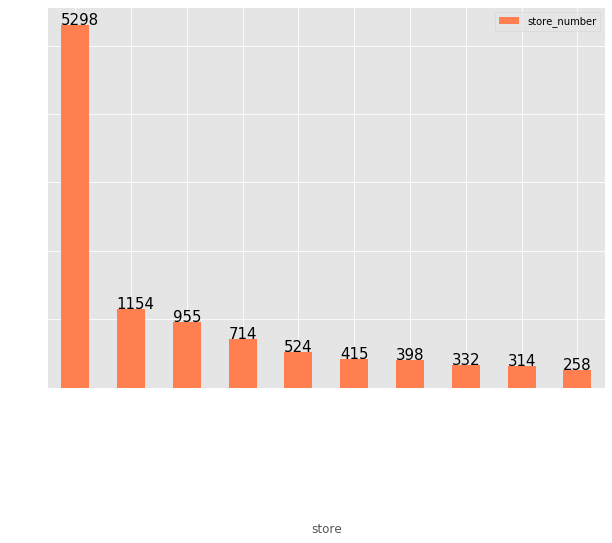

In [355]:
ax = stores_counts.head(10).plot(kind='bar', figsize=(10,7),
                                       color="coral", fontsize=13)
ax.set_alpha(0.8)
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='x', colors='white')


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.005, i.get_height(), str(i.get_height()),fontsize=15,
                color='black')

In [356]:
weeks = list(df.columns[:][3:].values)
week_sums = []
for i in weeks:
    df[i].str.replace(',', '')
    w = pd.to_numeric(df[i], errors='coerce')
    week_sums.append(w.sum())

df_weeks = pd.DataFrame(week_sums, weeks).reset_index()
df_weeks = df_weeks.rename(columns={"index":"Week Ending", 0:"Total"})
df_weeks.Total = df_weeks.Total.astype(int)
df_weeks = df_weeks.set_index('Week Ending')

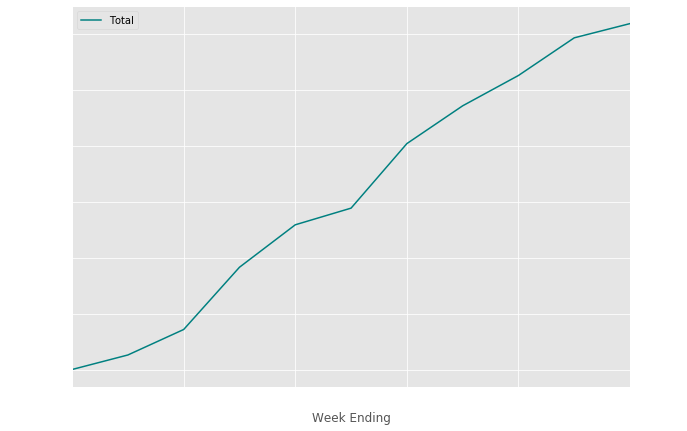

In [357]:
ax = df_weeks.plot(kind='line', figsize=(10,7),
                                       color="teal", fontsize=13)
ax.set_alpha(0.8)
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='x', colors='white')



In [358]:
c_list = ['store'] + list(df.columns[:][3:])

df_store_count = df[c_list]

for i in df_store_count.columns[:][3:].values:
    df_store_count[i].str.replace(',', '')
    df_store_count[i] = pd.to_numeric(df_store_count[i], errors='coerce')
    
    nlist = []
    
    for n in df_store_count[i]:
        if n > 0:
            nlist.append(1.0)
        else:
            nlist.append(0.0)
        
    df_store_count[i] = nlist

     

            




/home/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [359]:
df_store_count = df_store_count.groupby('store')[list(df.columns[:][3:])].sum().T.plot

In [360]:
df_store_count.head()

store,76,Ampm,Arco,C Stop,Carol International Petroleum,Carson Shell & Car Wash,Chevron,Chevron Extra Mile,Chula Vista Auto Care 76,Circle K,...,Stop & Go,Thorntons,United Oil,United Pacific,Valero,Valero Corner Store,Verc,Wawa,We Got It Food Mart,Yum Markets
4 W/E 10/06/18,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,82.0,0.0,0.0,0.0,0.0,0.0,551.0,0.0,0.0
4 W/E 11/03/18,0.0,128.0,0.0,1.0,1.0,0.0,0.0,28.0,0.0,3107.0,...,0.0,133.0,1.0,0.0,7.0,1.0,0.0,603.0,4.0,0.0
4 W/E 12/01/18,4.0,212.0,0.0,1.0,0.0,0.0,14.0,170.0,0.0,4214.0,...,1.0,168.0,1.0,0.0,8.0,1.0,1.0,621.0,34.0,0.0
4 W/E 12/29/18,4.0,621.0,1.0,2.0,1.0,1.0,21.0,200.0,1.0,4513.0,...,1.0,178.0,2.0,0.0,8.0,1.0,1.0,641.0,40.0,0.0
4 W/E 01/26/19,9.0,719.0,1.0,1.0,1.0,1.0,22.0,228.0,0.0,4850.0,...,1.0,185.0,4.0,0.0,8.0,1.0,1.0,650.0,42.0,0.0


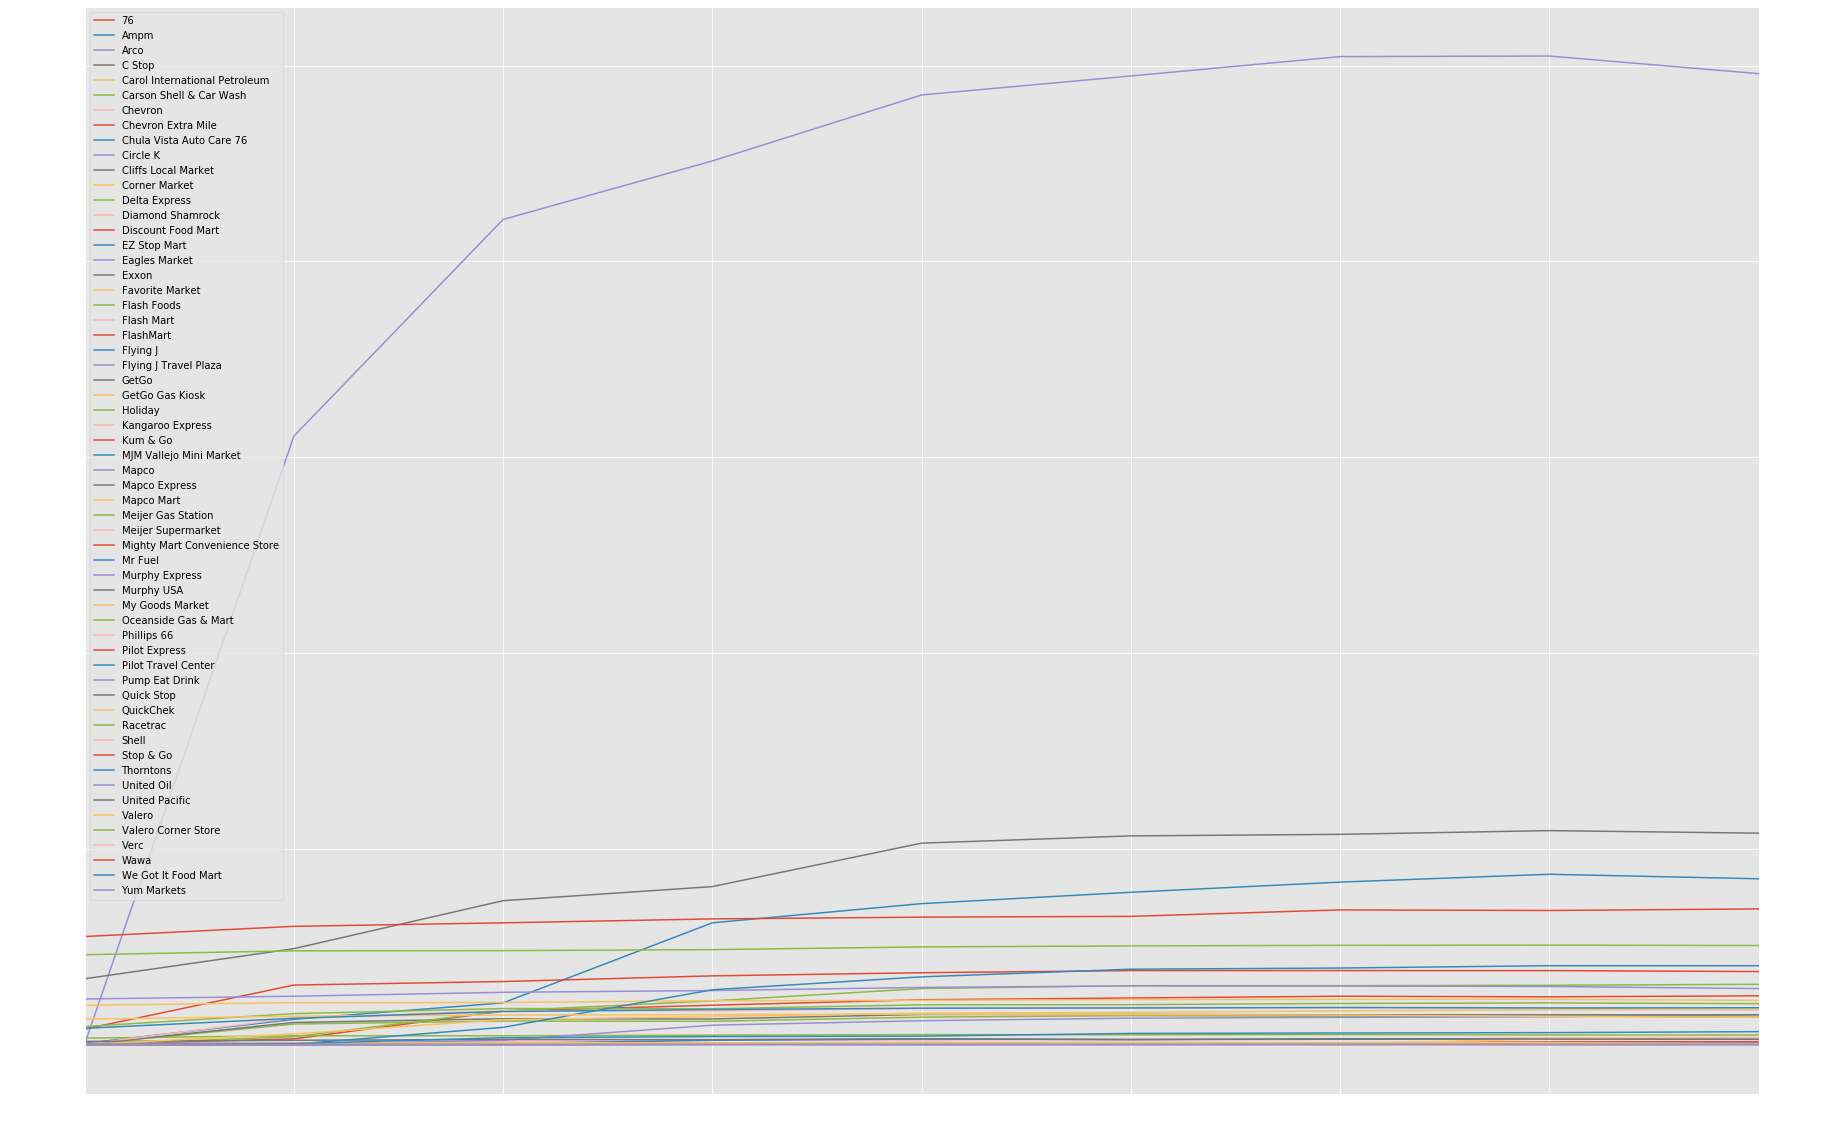

In [371]:
ax = df_store_count.plot(kind='line', figsize=(30,20), fontsize=20)
ax.set_alpha(0.8)
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='x', colors='white')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)